# Numerical results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import examples as exa
import scipy.integrate as si
from plot_ex import plot_order, plot_contourn
from integrators import HBr
plt.rcParams['font.size'] = 15


Method                          | Abbreviation|X0    |P0        |X0t    |P0t
--------                        | -------     |-----|-----     |----- |-----
Relativistic Bregman Bravetti   | RB          |0    | gradh(P0)|  -   |-
Relativistic Bregman Bravetti (adap)   | RB          |0    | gradh(P0)|  -   |-
Relativistic Bregman Bravetti (g)  | RB          |0    | gradh(P0)|  -   |-
Adaptative HTVI                 | HTVI_adap   |0    | 0        |(0,1) |-Hbr(X0,P0,X0t)
Direct Splitting (Betancourt)   | BS_d        |0    | 0        |    - |0

## Example 1 (Quartic function)

Let us start with a quartic function

\begin{equation}\label{eq:quart}
f(X)=[(X-1)^T \Sigma (X-1)]^2\in \mathbb{R}^{50},\quad \Sigma_{ij}=0.9^{|i-j|}. 
\end{equation}
This convex function achieves its minimum value $0$ at $x^*=1$.


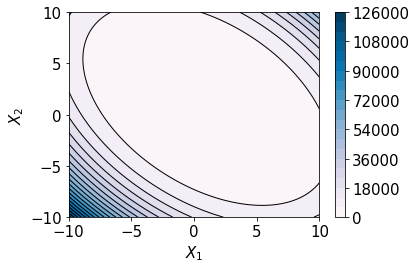

In [2]:
n = 2 # dimension
ex = exa.Example6(n)
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [3]:
## Parameters
dt = 1e-4
dt_g = 1e-6
c = 3  # order
C = 0.1
m=0.01
v=1000
steps =25000
params=[v, m, c, C]

In [4]:
# Initial conditions 
p0 = np.zeros(n)  # p0=(0,0,...,0)
x0 = np.random.rand(n)
#x0=np.ones(n)
#x0 = np.zeros(n)  # x0=(0,0,...,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) #np.zeros(q0.shape)
init =[x0, x0_t, p0, p0_t] 

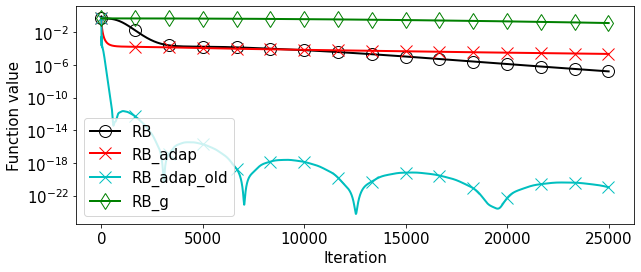

In [5]:
plt.figure(figsize=(10, 4))
#plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=1e-2,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 2 (Quadratic function)

\begin{equation}\label{eq:quad}
f(X)=\frac{1}{2}X^T AX,\quad X \in \mathbb{R}^{500},\quad \lambda(A)\sim \mathcal{U}(10^{-3},1),
\end{equation}

where $A \in \mathbb{R}^{500 \times 500}$ is a positive--definite random matrix with eigenvalues 
uniformly distributed over the range $[10^{-3},1].$ 

$x_0=(1,1,...,1)$


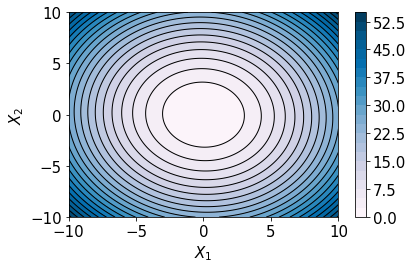

In [6]:
n = 100
seed=0
ex = exa.Example1(seed, n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [7]:
## Parameters
dt =1e-2
c = 2 # order
C = 0.1
m=0.01
v=1000
steps =2000
params=[v, m, c, C]

In [8]:
# Initial conditions 
p0 = np.zeros(n)     # p0=(0,0,...,0)
x0 = np.ones(n)      # x0=(1,1,...,1)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

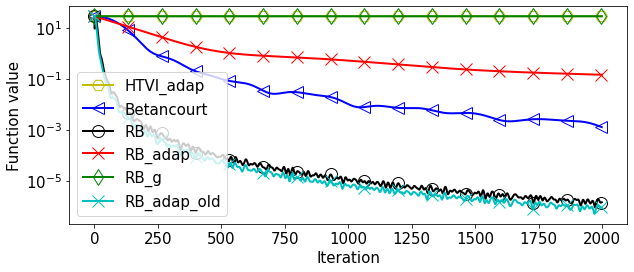

In [9]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-4,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)


## Example 3 (Quartic function 2)

\begin{equation}
f(X)=\sum_{i=1}^n i X_i^{4},  \quad n=50.
\end{equation}
This function is an example of a convex function that has a global minimum at $f(0)=0$, surrounded by a very flat region.

$x_0=(2,2,...,2)$


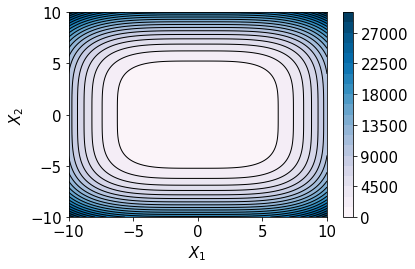

In [10]:
n = 50 # dimension
ex = exa.Example7() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [11]:
## Parameters
dt = 1e-6
c = 4  # order
C = 0.01
steps =2000
m=0.01
v=1000
params=[v, m, c, C]

In [12]:
# Initial conditions 
p0 = np.zeros(n)     # p0=(0,0,...,0)
x0 = 2*np.ones(n)    # x0=(2,2,...,2)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

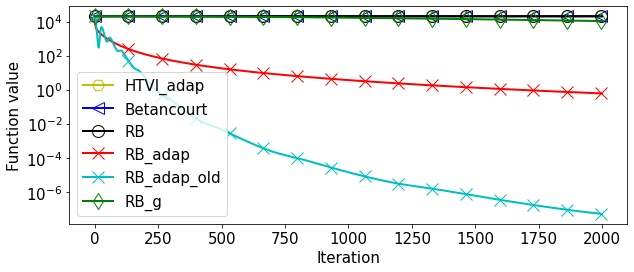

In [13]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=1e-3,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

### Example 4 (Camelback Function)
We consider the nonconvex Camelback objective function,

\begin{equation}\label{eq:camelback}
f(X_1, X_2)=2X_1^2 - 1.05X_1^4 + \frac{1}{6}X_1^6 + X_1 X_2 + X_2^2.
\end{equation}
 A unique global minimum can be found at $f(0,0)=0$ while two local minima 
are located at $(X_{1}^{\pm},X_{2}^{\pm})\simeq\pm(-1.75,0.87)$ with $f(X_{1}^{\pm},X_{2}^{\pm})\simeq 0.3$.

In this case $x_0=(1.8,-0.9)$

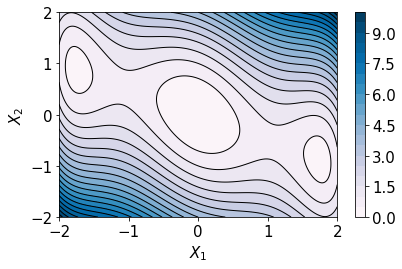

In [14]:
n = 2
x0 = np.array([1.8, -0.9]) 
ex = exa.Example3(x0) 
plot_contourn(ex, xmin=-2, xmax=2, ymin=-2, ymax=2)

In [15]:
## Parameters
dt = 1e-4
c = 2  # order
C = 1
steps =2000
m=0.01
v=1000
params=[v, m, c, C]

In [16]:
# Initial conditions 
p0 = np.zeros(n)             # p0=(0, 0)
x0 = np.array([1.8, -0.9])   # x0=(1.8, -0.9)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

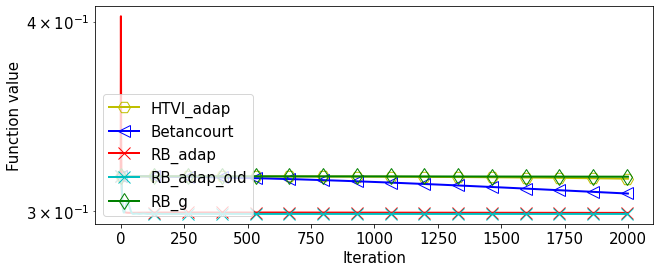

In [17]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-6,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=1e-3,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 5 (Booth function)
$$f(x, y) = (x+2 y-7)^{2}+(2 x+y-5)^{2}$$
Global minimum at $f(1,3)=0 .$ We initialize at $x_{0}=(10,10)$. This function is usually evaluated on the region $-10 \leqslant x, y \leqslant 10 .$ All methods perform well on this problem which is not challenging.

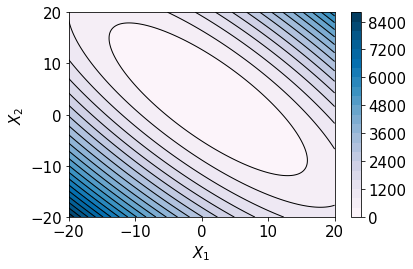

In [18]:
n = 2
seed = 0
ex = exa.Example5(seed, n) 
plot_contourn(ex, xmin=-20, xmax=20, ymin=-20, ymax=20)

In [19]:
## Parameters
dt = 1e-2
c = 2 # order
C = 0.1
steps =1000
m=0.01
v=1000
params=[v, m, c, C]

In [20]:
# Initial conditions 
p0 = np.zeros(n)     # p0=(0,0)
x0 = np.array([10,10])    # x0=(2,2,...,2)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

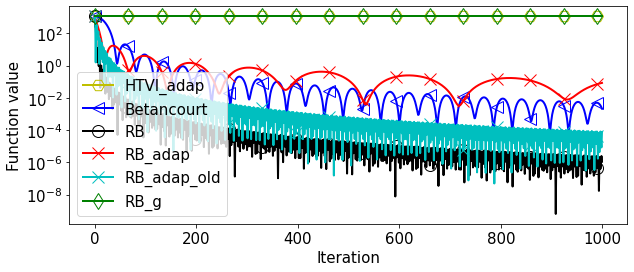

In [21]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-4,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 6 (Schwefel function)
$$f(x) \equiv \sum_{i=1}^{n} x_{i}^{10} .$$
The minimum is at $f(0)=0$. The function is usually considered over $-10 \leqslant x_{i} \leqslant 10$. This function grows even stronger than the previous two cases. We consider $n=20$ dimensions and initialize at $x_{0}=(2, \ldots, 2) .$ Note that $\delta>0$ is essential to control the kinetic energy and improve convergence.


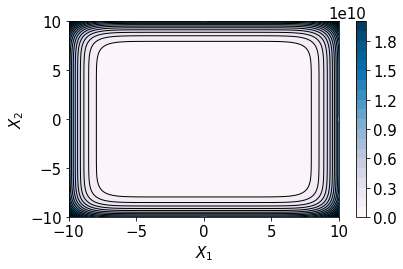

In [22]:
n = 20
seed = 0
ex = exa.Example8(n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [23]:
# Params
dt = 1e-3
c = 2   # order
C =0.1
steps =1000
m=0.01
v=1000
params=[v, m, c, C]

In [24]:
# Initial conditions 
p0 = np.zeros(n)     # p0=(0,0)
x0 = 2*np.ones(n)    # x0=(2,2,...,2)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

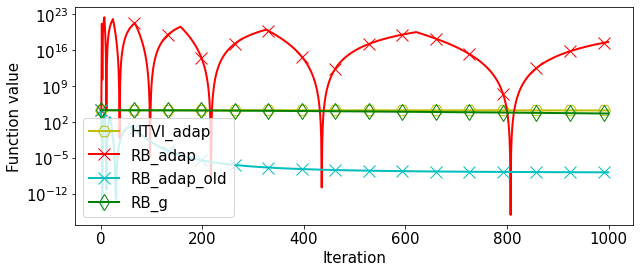

In [25]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-6,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)


## Example 7(Correlated quadratic function)
Let us consider the correlated quadratic function
$$
f(X)=\frac{1}{2} X^{T} A X, \quad A_{i j}=\frac{\sqrt{i j}}{2^{|i-j|}} \quad \text { for } \quad i, j=1, \ldots, 50
$$
The initial position in each is sampled uniformly at random in the range $-1 \leq X_{0, i} \leq 1$.



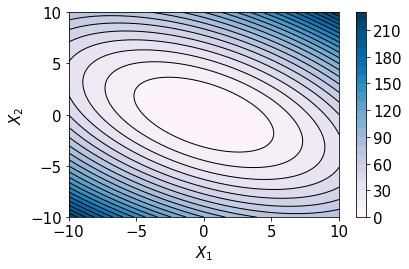

In [26]:
n = 50
seed = 0
ex = exa.Example2(n) 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [27]:
# Params
dt = 1e-3
c = 2# order
C = 0.1
steps =1000
m=0.01
v=1000
params=[v, m, c, C]

In [28]:
# Initial conditions 
np.random.seed(0)
p0 = np.zeros(n)     # p0=(0,0)
x0 = np.random.uniform(-1, 1,n)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

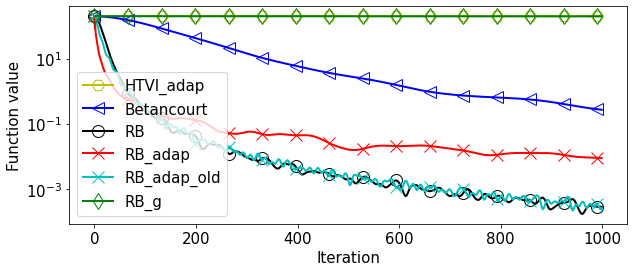

In [29]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-4,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 8 (Matyas function)
Matyas function:
$$f(x, y) \equiv 0.26\left(x^{2}+y^{2}\right)-0.48 x y .$$ 
Global minimum is at $f(0,0)=0 .$ We initialize at $x_{0}=(10,-7)$. This function is usually evaluated on the region $-10 \leqslant x, y \leqslant 10$. 

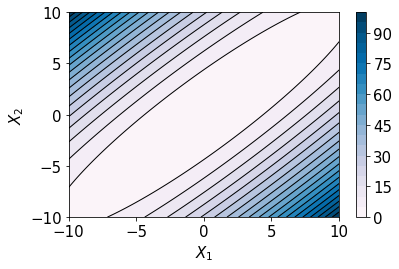

In [30]:
ex = exa.Example9() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [31]:
# Params
dt = 0.01 
c = 3   # order
C = 0.1
steps =1000
m=0.01
v=1000
params=[v, m, c, C]

In [32]:
# Initial conditions 
n=2
x0 = np.array([10, -7])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

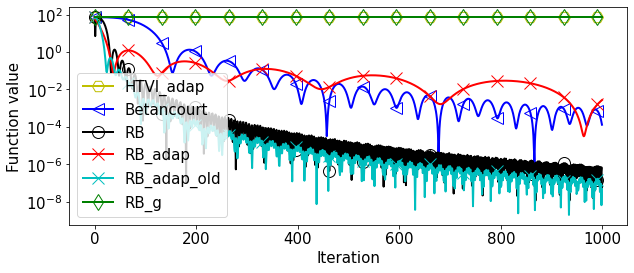

In [33]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-3,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 9 (Lévi function)
Lévi function #13: $f(x, y) \equiv \sin ^{2} 3 \pi x+(x-1)^{2}\left(1+\sin ^{2} 3 \pi y\right)+(y-$ 1) $^{2}\left(1+\sin ^{2} 2 \pi y\right)$. This function is multimodal, with the global minimum at $f(1,1)=0 .$ We initialize at $x_{0}=(10,-10)$. This function is usually studied on the region $-10 \leqslant x, y \leqslant 10$. Although this function is nonconvex, the optimization problem is not very challenging. 

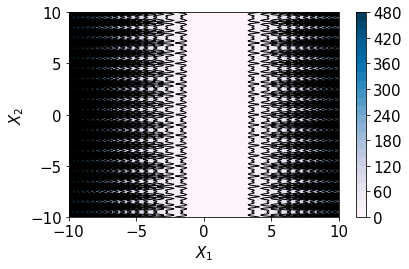

In [34]:
ex = exa.Example10() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)

In [35]:
# Params
dt = 1e-3
c = 2 # order
C = 1
steps =3000
m=0.01
v=1000
params=[v, m, c, C]


In [36]:
# Initial conditions 
n=2
x0 = np.array([10, -10])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

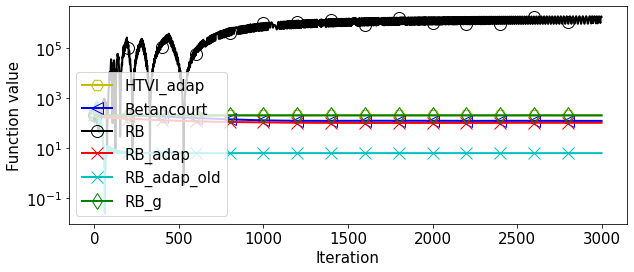

In [37]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=1e-3,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 10 (Sum of squares)
$$f(x) \equiv \sum_{i=1}^{n} i x_{i}^{2} .$$
The minimum is at $f(0)=0 .$ We consider $n=100$ dimensions and initialize at $x_{0}=(10, \ldots, 10) .$ The usual region of study is $-10 \leqslant x_{i} \leqslant 10 .$ 

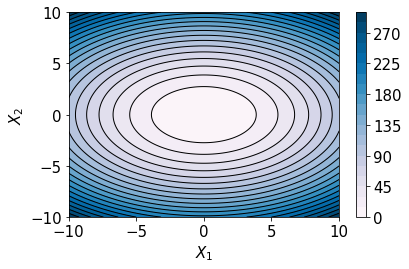

In [38]:
ex = exa.Example11() 
plot_contourn(ex, xmin=-10, xmax=10, ymin=-10, ymax=10)


In [42]:
# Params
dt = 0.001 
c = 3   # order
C = 1
steps =3000
m=0.01
v=1000
params=[v, m, c, C]

In [43]:
n=100
x0 = 10 * np.ones(n)
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

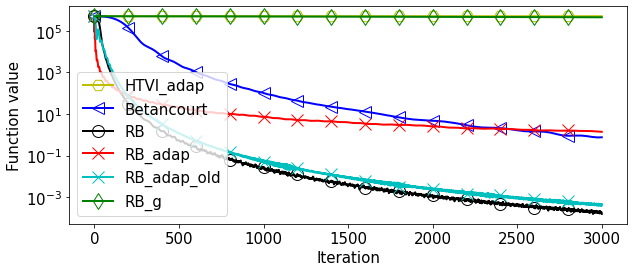

In [44]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-4,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 11 (Beale function)
$f(x, y) \equiv(1.5-x+x y)^{2}+\left(2.25-x+x y^{2}\right)^{2}+(2.625$ $\left.-x+x y^{3}\right)^{2} .$ The global minimum is at $f(3,1 / 2)=0$, lying on a flat and narrow valley which makes optimization challenging. Note also that this functions grows stronger than a quadratic. This function is usually considered on the region $-4.5 \leqslant$ $x, y \leqslant 4.5 .$ We initialize at $x_{0}=(-3,-3) .$ 

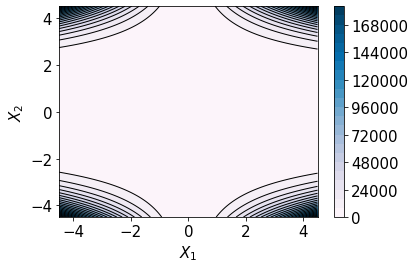

In [45]:
ex = exa.Example12() 
plot_contourn(ex, xmin=-4.5, xmax=4.5, ymin=-4.5, ymax=4.5)

In [52]:
# Params
dt = 1e-5 
c = 4  # order
C = 0.1
steps =1000
m=0.01
v=1000
params=[v, m, c, C]

In [53]:
n=2
x0 = np.array([-3,-3])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

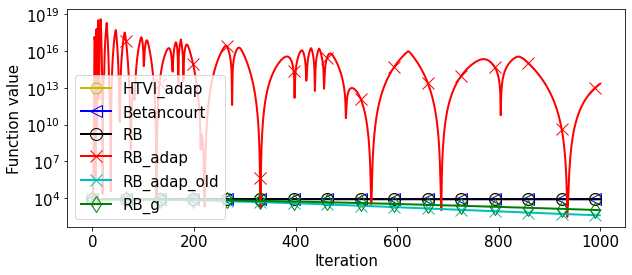

In [54]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-7,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 12(Chung-Reynolds function)
$$f(x) \equiv\left(\sum_{i=1}^{n} x_{i}^{2}\right)^{2}.$$ The global minimum is at $f(0)=0 .$ This function is usually considered on the region $-100 \leqslant x_{i} \leqslant 100 .$ We consider $n=50$ dimensions and initialize at $x_{0}=(50, \ldots, 50)$. 

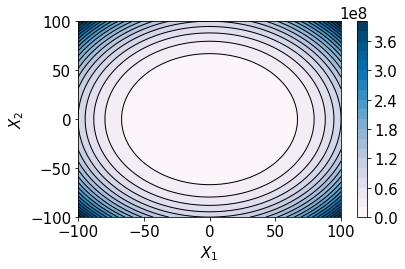

In [63]:
ex = exa.Example13() 
plot_contourn(ex, xmin=-100, xmax=100, ymin=-100, ymax=100)

In [64]:
# Params
dt = 1e-2
c = 2 # order
C = 1
steps =2000
m=0.01
v=1000
params=[v, m, c, C]

In [65]:
n=50
x0 = 50*np.ones(n)
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t] 

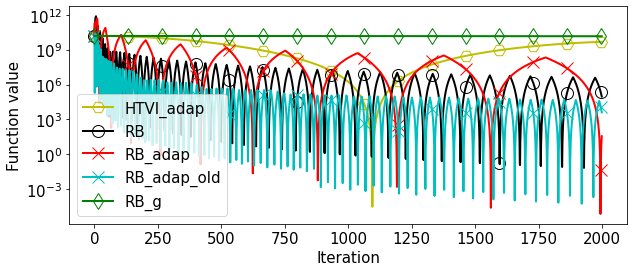

In [66]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
#plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 14(Zakharov function)
$f(x) \equiv \sum_{i=1}^{n} x_{i}^{2}+\left(\frac{1}{2} \sum_{i=1}^{n} i x_{i}\right)^{2}+\left(\frac{1}{2} \sum_{i=1}^{n} i x_{i}\right)^{4}$ The minimum is at $f(0)=0 .$ The region of interest is usually $-5 \leqslant x_{i} \leqslant 10$. We consider $n=5$ and initialize at $x_{0}=(1, \ldots, 1) $.

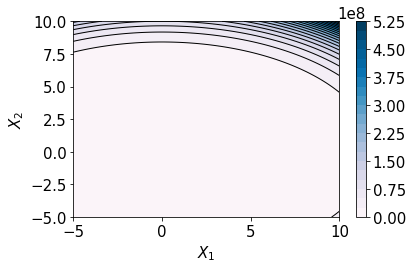

In [67]:
ex = exa.Example14() 
plot_contourn(ex, xmin=-5, xmax=10, ymin=-5, ymax=10)

In [68]:
# Params
dt = 1e-3
c = 2  # order
C = 0.1
steps =2000
m=0.01
v=1000
params=[v, m, c, C]

In [69]:
n=5
x0 = np.ones(n)
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t]

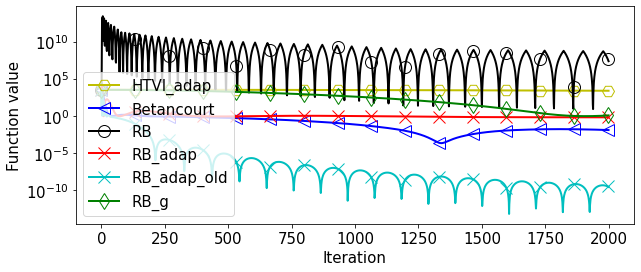

In [70]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-6,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 15(Qing function)
$f(x) \equiv \sum_{i=1}^{n}\left(x_{i}^{2}-i\right)^{2}$. This function is multimodal, with minimum at $x_{i}^{\star}=\pm \sqrt{i}, f\left(x^{\star}\right)=0 .$ The function is usually studied in the region $-500 \leqslant x_{i} \leqslant 500 .$ We consider $n=100$ dimensions with initialization at $x_{0}=(50, \ldots, 50)$


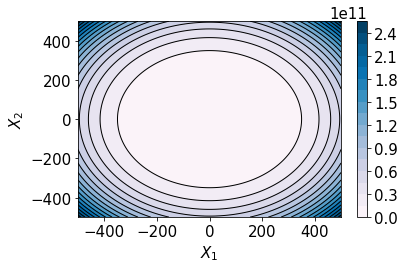

In [71]:
ex = exa.Example15() 
plot_contourn(ex, xmin=-500, xmax=500, ymin=-500, ymax=500)

In [72]:
# Params
dt = 1e-3
c = 2  # order
C = 0.1
steps =500
m=0.01
v=1000
params=[v, m, c, C]

In [73]:
n=100
x0 = np.ones(n)
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t]

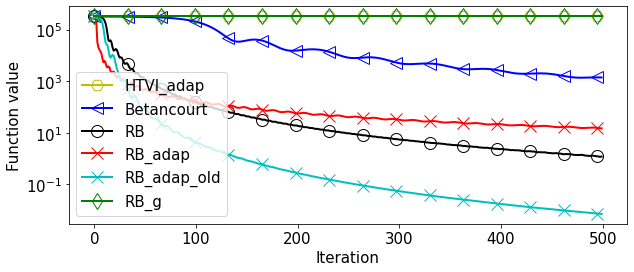

In [74]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-4,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)

## Example 16(Three-hump camel back function)
$f(x, y) \equiv 2 x^{2}-1.05 x^{4}+x^{6} / 6+$ $x y+y^{2}$.
This is a multimodal function with global minimum is at $f(0,0)=0$. The region of interest is usually $-5 \leqslant x, y \leqslant 5 .$ We initialize at $x_{0}=(5,5) .$ The two local minima are somewhat close to the global minimum which makes optimization challenging. 


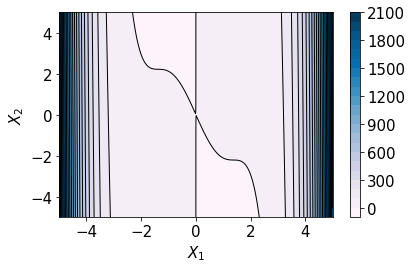

In [75]:
ex = exa.Example16() 
plot_contourn(ex, xmin=-5, xmax=5, ymin=-5, ymax=5)


In [76]:
# Params
dt = 1e-5
c = 1  # order
C = 1
steps =2000
m=0.01
v=1000
params=[v, m, c, C]

In [77]:
n=2
x0 = np.array([5,5])
p0 = np.zeros(n)     # p0=(0,0)
x0_t = 0.01
p0_t = -HBr(ex, x0, p0, x0_t, c) 
init =[x0, x0_t, p0, p0_t]

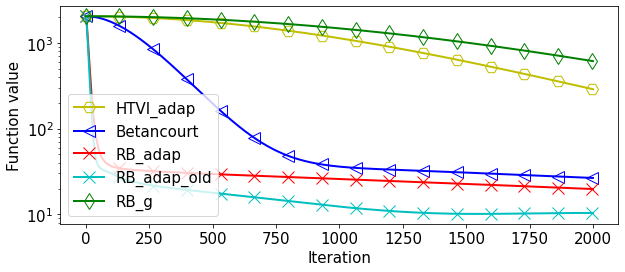

In [78]:
plt.figure(figsize=(10, 4))
plot_order('HTVI_adap', color='y', marker='H',params=params, dt=1e-5,steps=steps,ex=ex, init=init)
plot_order('Betancourt', color='b', marker='<',params=params, dt=dt,steps=steps,ex=ex, init=init)
#plot_order('RB', color='k', marker='o',params=params, dt=dt,steps=steps,ex=ex, init=init)
plot_order('RB_adap', color='r', marker='x',params=params, dt=1e-6,steps=steps,ex=ex, init=init)
plot_order('RB_adap_old', color='c', marker='x',params=params, dt=1e-6,steps=steps,ex=ex, init=init)
plot_order('RB_g', color='g', marker='d',params=params, dt=dt_g,steps=steps,ex=ex, init=init)